In [17]:
import sys
sys.path.append("../..")


from experiments.plt_pab_fae import plt_fab_fae
from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.BB84TrainableProtocol import BB84TrainableProtocol
from protocol.connection_elements.Layer import SeparableLayer, EntangledLayer
from protocol.BB84Protocol import BB84Protocol
from protocol.connection_elements.MultiQubitQCLEve import MultiQubitQCLEve


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


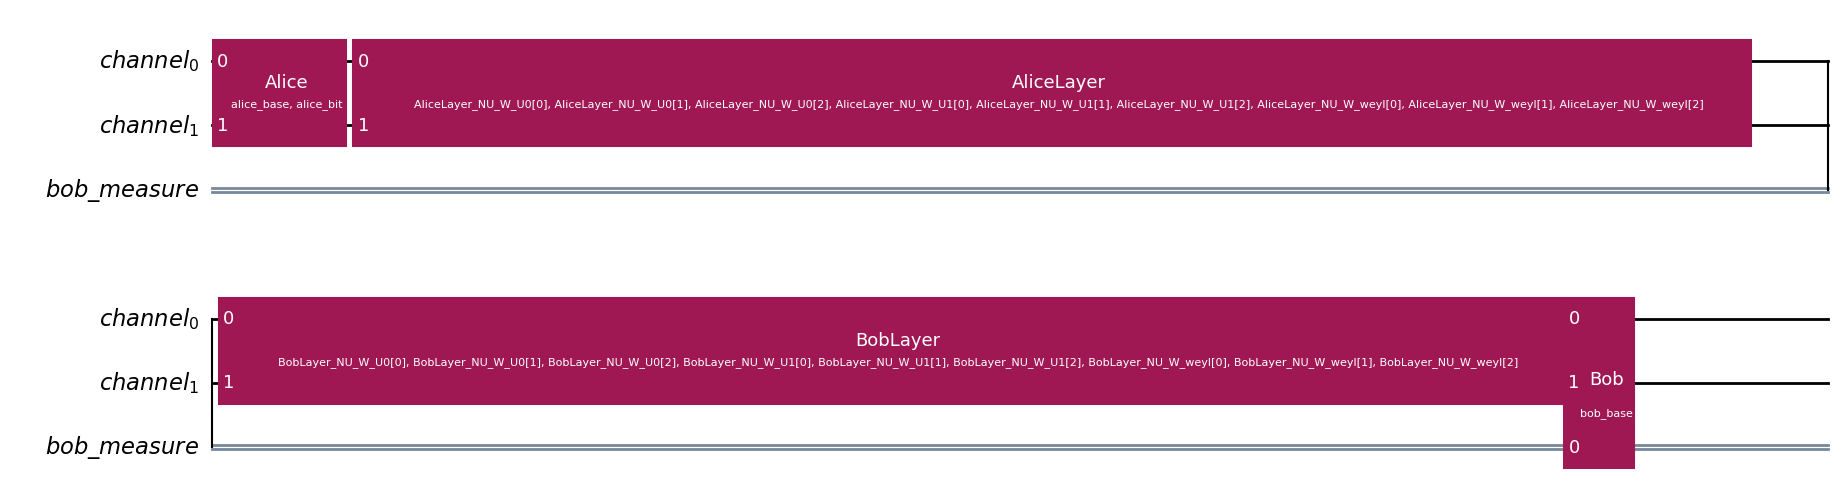

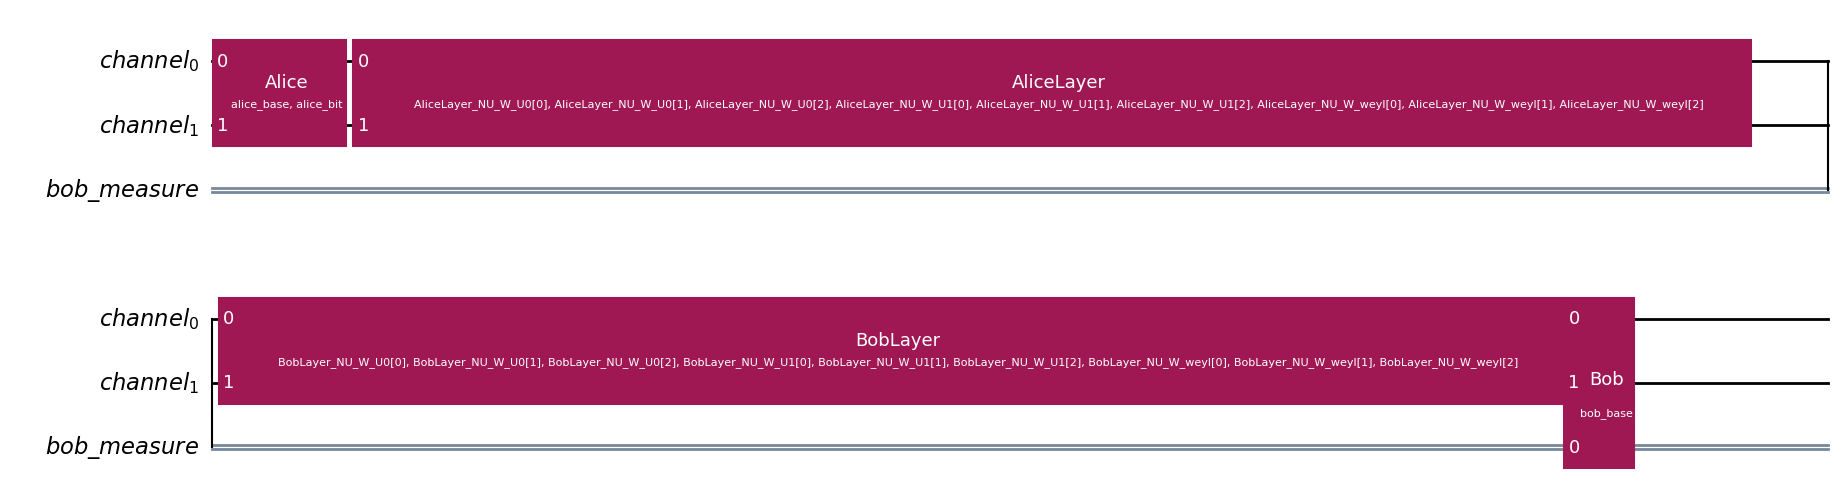

In [18]:
layers = [EntangledLayer("AliceLayer"), EntangledLayer("BobLayer")]
eve = MultiQubitQCLEve()

ab_protocol = BB84TrainableProtocol(n_bits=512, elements=layers, channel_size=2, seed=0, learning_rate=0.1)
eve_protocol = BB84EveTrainableProtocol(n_bits=512, elements=[layers[0], eve, layers[1]], channel_size=2,
                                        seed=0, alpha=1, learning_rate=0.05)

qc, _ = ab_protocol.qc_with_ctx()
qc.draw("mpl", expr_len=3)

In [19]:
def train_eve():
    bob_qber, eve_qber = [], []
    qber = eve_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(qber['eve_qber'])
    print(f'start QBER: {qber}')
    for epoch in range(50):
        loss = eve_protocol.train()
        qber = eve_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0 or epoch == 49:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

def train_ab():
    bob_qber, eve_qber = [], []
    qber = ab_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(0.5)
    print(f'start QBER: {qber}')
    for epoch in range(20):
        loss = ab_protocol.train()
        qber = ab_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(0.5)
        if epoch % 5 == 0 or epoch == 19:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

# Krok 1 - trenowanie Alice i Boba do początkowego stanu
Uczymy Alice i Boba bez Eve, aby miały sensowne parametry początkowe i potrafiły przekazywać sobie dane.

In [20]:
b_q, e_q = train_ab()

start QBER: {'bob_qber': np.float64(0.2222222222222222)}
epoch: 0, loss: -0.8163297176361084, QBER: {'bob_qber': np.float64(0.16666666666666663)}
epoch: 5, loss: -0.9613717794418335, QBER: {'bob_qber': np.float64(0.031746031746031744)}
epoch: 10, loss: -0.9820461273193359, QBER: {'bob_qber': np.float64(0.031746031746031744)}
epoch: 15, loss: -0.9818181991577148, QBER: {'bob_qber': np.float64(0.007936507936507908)}
epoch: 19, loss: -0.9905657172203064, QBER: {'bob_qber': np.float64(0.007936507936507908)}


<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

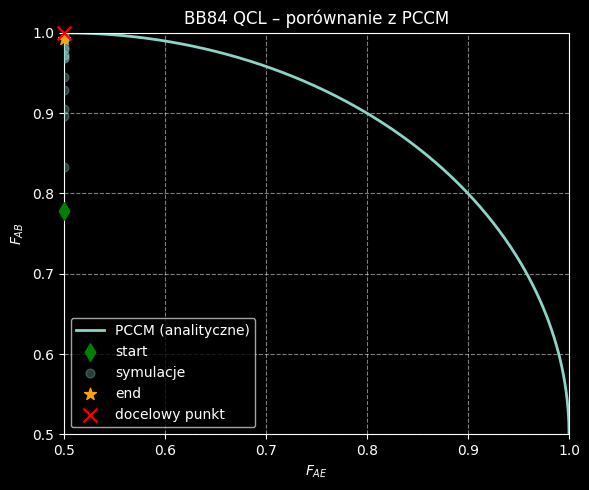

In [21]:
plt_fab_fae(b_q, e_q, 1)

# Krok 2 - trenowanie tylko Eve, warstwy Alice i Boba zamrożone
Uczymy samą Eve, docelowa dokładność Boba to 0.8. Startujemy od parametrów Alice i Boba wytrenowanych w poprzednim kroku i Eve jako identyczność.

In [22]:
eve_protocol.set_parameters(ab_protocol.get_all_parameters())

params = eve_protocol.get_all_parameters()
for p in eve.nu.params():
    k = p.name
    params[k] = 0

eve_protocol.set_parameters(params)
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.0), 'NU_W_0_0_U0[1]': np.float32(0.0), 'NU_W_0_0_U0[2]': np.float32(0.0), 'NU_W_0_0_U1[0]': np.float32(0.0), 'NU_W_0_0_U1[1]': np.float32(0.0), 'NU_W_0_0_U1[2]': np.float32(0.0), 'NU_W_0_0_weyl[0]': np.float32(0.0), 'NU_W_0_0_weyl[1]': np.float32(0.0), 'NU_W_0_0_weyl[2]': np.float32(0.0), 'NU_W_0_1_U0[0]': np.float32(0.0), 'NU_W_0_1_U0[1]': np.float32(0.0), 'NU_W_0_1_U0[2]': np.float32(0.0), 'NU_W_0_1_U1[0]': np.float32(0.0), 'NU_W_0_1_U1[1]': np.float32(0.0), 'NU_W_0_1_U1[2]': np.float32(0.0), 'NU_W_0_1_weyl[0]': np.float32(0.0), 'NU_W_0_1_weyl[1]': np.float32(0.0), 'NU_W_0_1_weyl[2]': np.float32(0.0), 'NU_W_1_0_U0[0]': np.float32(0.0), 'NU_W_1_0_U0[1]': np.float32(0.0), 'NU_W_1_0_U0[2]': np.float32(0.0), 'NU_W_1_0_U1[0]': np.float32(0.0), 'NU_W_1_0_U1[1]': np.float32(0.0), 'NU_W_1_0_U1[2]': np.float32(0.0), 'NU_W_1_0_weyl[0]': np.float32(0.0), 'NU_W_1_0_weyl[1]': np.float32(0.0), 'NU_W_1_0_weyl[2]': np.float32(0.0), 'NU_W_2_0_U0[0

In [23]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss10
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.003676470588235281), 'eve_qber': np.float64(0.5294117647058824)}
epoch: 0, loss: -0.9857732057571411, QBER: {'bob_qber': np.float64(0.03308823529411764), 'eve_qber': np.float64(0.5257352941176471)}
epoch: 5, loss: -0.9841040372848511, QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.49264705882352944)}
epoch: 10, loss: -0.9867860674858093, QBER: {'bob_qber': np.float64(0.03308823529411764), 'eve_qber': np.float64(0.4632352941176471)}
epoch: 15, loss: -1.019116759300232, QBER: {'bob_qber': np.float64(0.014705882352941124), 'eve_qber': np.float64(0.4007352941176471)}
epoch: 20, loss: -1.065605878829956, QBER: {'bob_qber': np.float64(0.0404411764705882), 'eve_qber': np.float64(0.3161764705882353)}
epoch: 25, loss: -1.116469144821167, QBER: {'bob_qber': np.float64(0.09926470588235292), 'eve_qber': np.float64(0.2279411764705882)}
epoch: 30, loss: -1.1510281562805176, QBER: {'bob_qber': np.float64(0.18382352941176472), 'eve_q

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

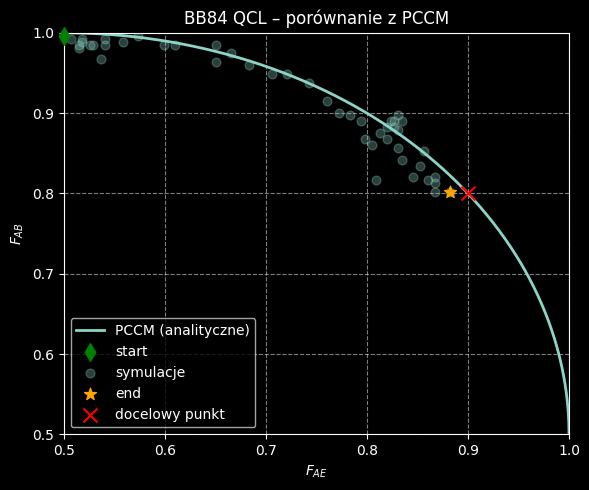

In [24]:
plt_fab_fae(b_q, e_q, 0.8)

# Krok 3 - trenowanie warstw Alice i Boba, Eve zamrożona
Próbujemy uczyć Alice i Boba z użyciem nowej funkcji straty, która maksymalizuje jedynie dokładność Boba.

In [25]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(-0.6073932), 'AliceLayer_NU_W_U0[1]': np.float32(-0.71901083), 'AliceLayer_NU_W_U0[2]': np.float32(0.55507344), 'AliceLayer_NU_W_U1[0]': np.float32(-0.30479264), 'AliceLayer_NU_W_U1[1]': np.float32(0.10128002), 'AliceLayer_NU_W_U1[2]': np.float32(0.15479028), 'AliceLayer_NU_W_weyl[0]': np.float32(0.0077125207), 'AliceLayer_NU_W_weyl[1]': np.float32(0.31307697), 'AliceLayer_NU_W_weyl[2]': np.float32(-0.340631), 'BobLayer_NU_W_U0[0]': np.float32(0.52493054), 'BobLayer_NU_W_U0[1]': np.float32(0.4025489), 'BobLayer_NU_W_U0[2]': np.float32(0.07924721), 'BobLayer_NU_W_U1[0]': np.float32(-1.5010006), 'BobLayer_NU_W_U1[1]': np.float32(0.1043303), 'BobLayer_NU_W_U1[2]': np.float32(0.10685707), 'BobLayer_NU_W_weyl[0]': np.float32(-0.3862047), 'BobLayer_NU_W_weyl[1]': np.float32(-0.25383335), 'BobLayer_NU_W_weyl[2]': np.float32(0.1633318)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(0.25809684), 'NU_W_0_0_U0[1]': np.float32(0.2429378

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [26]:
eve_loss = eve_protocol.loss
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.19852941176470584), 'eve_qber': np.float64(0.11764705882352944)}
epoch: 0, loss: -0.8206819295883179, QBER: {'bob_qber': np.float64(0.15441176470588236), 'eve_qber': np.float64(0.14338235294117652)}
epoch: 5, loss: -0.8852949142456055, QBER: {'bob_qber': np.float64(0.07352941176470584), 'eve_qber': np.float64(0.24264705882352944)}
epoch: 10, loss: -0.9299138188362122, QBER: {'bob_qber': np.float64(0.05147058823529416), 'eve_qber': np.float64(0.3345588235294118)}
epoch: 15, loss: -0.9644421339035034, QBER: {'bob_qber': np.float64(0.03308823529411764), 'eve_qber': np.float64(0.4227941176470589)}
epoch: 20, loss: -0.9813766479492188, QBER: {'bob_qber': np.float64(0.018382352941176516), 'eve_qber': np.float64(0.4779411764705882)}
epoch: 25, loss: -0.984005331993103, QBER: {'bob_qber': np.float64(0.022058823529411797), 'eve_qber': np.float64(0.5)}
epoch: 30, loss: -0.9788445830345154, QBER: {'bob_qber': np.float64(0.02941176470588236), 'eve_qber': np.fl

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

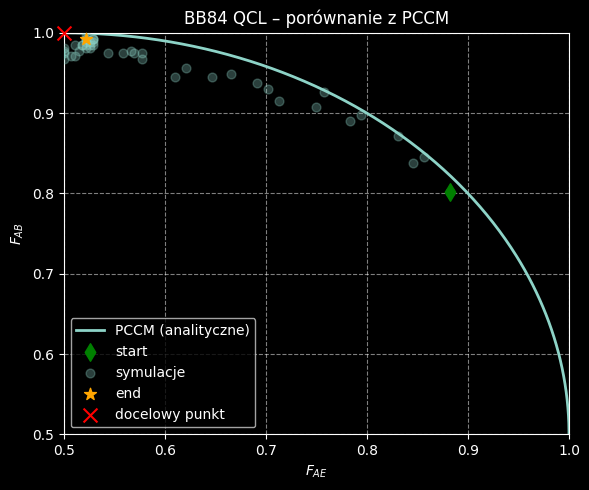

In [27]:
plt_fab_fae(b_q, e_q, 1)

In [28]:
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.25809684), 'NU_W_0_0_U0[1]': np.float32(0.24293785), 'NU_W_0_0_U0[2]': np.float32(0.2617152), 'NU_W_0_0_U1[0]': np.float32(-0.6006167), 'NU_W_0_0_U1[1]': np.float32(-0.71982735), 'NU_W_0_0_U1[2]': np.float32(-0.40430295), 'NU_W_0_0_weyl[0]': np.float32(-0.63910776), 'NU_W_0_0_weyl[1]': np.float32(0.2084699), 'NU_W_0_0_weyl[2]': np.float32(-1.0006799), 'NU_W_0_1_U0[0]': np.float32(-0.08789002), 'NU_W_0_1_U0[1]': np.float32(-0.36858165), 'NU_W_0_1_U0[2]': np.float32(-1.4804118e-09), 'NU_W_0_1_U1[0]': np.float32(0.027905818), 'NU_W_0_1_U1[1]': np.float32(-0.5815436), 'NU_W_0_1_U1[2]': np.float32(3.6140742e-09), 'NU_W_0_1_weyl[0]': np.float32(-0.06959175), 'NU_W_0_1_weyl[1]': np.float32(-0.07991111), 'NU_W_0_1_weyl[2]': np.float32(-0.37435877), 'NU_W_1_0_U0[0]': np.float32(-0.03552858), 'NU_W_1_0_U0[1]': np.float32(0.21993364), 'NU_W_1_0_U0[2]': np.float32(0.23318025), 'NU_W_1_0_U1[0]': np.float32(0.32038635), 'NU_W_1_0_U1[1]': np.float

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [29]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss10
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.4779411764705882)}
epoch: 0, loss: -1.0133421421051025, QBER: {'bob_qber': np.float64(0.014705882352941124), 'eve_qber': np.float64(0.4375)}
epoch: 5, loss: -1.147213101387024, QBER: {'bob_qber': np.float64(0.09926470588235292), 'eve_qber': np.float64(0.20588235294117652)}
epoch: 10, loss: -1.1942764520645142, QBER: {'bob_qber': np.float64(0.2279411764705882), 'eve_qber': np.float64(0.09926470588235292)}
epoch: 15, loss: -1.188376545906067, QBER: {'bob_qber': np.float64(0.21323529411764708), 'eve_qber': np.float64(0.07352941176470584)}
epoch: 20, loss: -1.187981367111206, QBER: {'bob_qber': np.float64(0.19117647058823528), 'eve_qber': np.float64(0.11764705882352944)}
epoch: 25, loss: -1.1986987590789795, QBER: {'bob_qber': np.float64(0.19117647058823528), 'eve_qber': np.float64(0.11029411764705888)}
epoch: 30, loss: -1.181138038635254, QBER: {'bob_qber': np.float64(0.18014705882352944), 'eve_qber': np.f

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

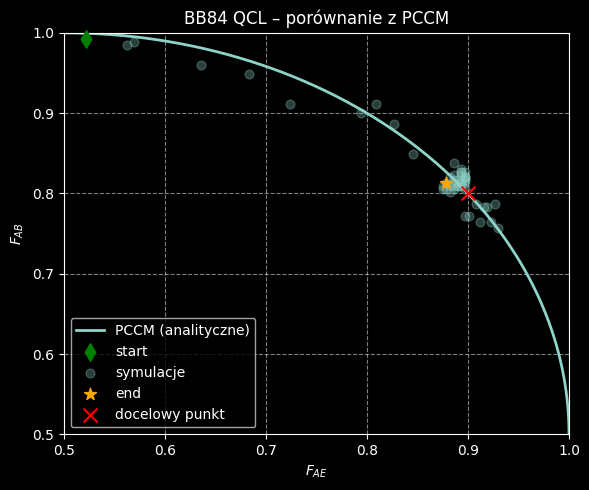

In [30]:
plt_fab_fae(b_q, e_q, 0.8)

In [31]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(-0.5129515), 'AliceLayer_NU_W_U0[1]': np.float32(-0.5948674), 'AliceLayer_NU_W_U0[2]': np.float32(1.3376412), 'AliceLayer_NU_W_U1[0]': np.float32(0.8214882), 'AliceLayer_NU_W_U1[1]': np.float32(0.17089711), 'AliceLayer_NU_W_U1[2]': np.float32(0.15479028), 'AliceLayer_NU_W_weyl[0]': np.float32(0.31457105), 'AliceLayer_NU_W_weyl[1]': np.float32(-0.576058), 'AliceLayer_NU_W_weyl[2]': np.float32(0.35305235), 'BobLayer_NU_W_U0[0]': np.float32(0.6188052), 'BobLayer_NU_W_U0[1]': np.float32(-0.5244362), 'BobLayer_NU_W_U0[2]': np.float32(-0.46869695), 'BobLayer_NU_W_U1[0]': np.float32(-1.070938), 'BobLayer_NU_W_U1[1]': np.float32(-0.2822148), 'BobLayer_NU_W_U1[2]': np.float32(-1.0265106), 'BobLayer_NU_W_weyl[0]': np.float32(-0.5506845), 'BobLayer_NU_W_weyl[1]': np.float32(-0.32062462), 'BobLayer_NU_W_weyl[2]': np.float32(0.2039344)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(0.48735404), 'NU_W_0_0_U0[1]': np.float32(-0.011601697),

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [32]:
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.1875), 'eve_qber': np.float64(0.12132352941176472)}
epoch: 0, loss: -0.8101634979248047, QBER: {'bob_qber': np.float64(0.16176470588235292), 'eve_qber': np.float64(0.13602941176470584)}
epoch: 5, loss: -0.8690584897994995, QBER: {'bob_qber': np.float64(0.1470588235294118), 'eve_qber': np.float64(0.2536764705882353)}
epoch: 10, loss: -0.9004165530204773, QBER: {'bob_qber': np.float64(0.11029411764705888), 'eve_qber': np.float64(0.3272058823529411)}
epoch: 15, loss: -0.9246234893798828, QBER: {'bob_qber': np.float64(0.06985294117647056), 'eve_qber': np.float64(0.43014705882352944)}
epoch: 20, loss: -0.9227803945541382, QBER: {'bob_qber': np.float64(0.10661764705882348), 'eve_qber': np.float64(0.4742647058823529)}
epoch: 25, loss: -0.9577398300170898, QBER: {'bob_qber': np.float64(0.047794117647058876), 'eve_qber': np.float64(0.5110294117647058)}
epoch: 30, loss: -0.9740389585494995, QBER: {'bob_qber': np.float64(0.022058823529411797), 'eve_qber': np.

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

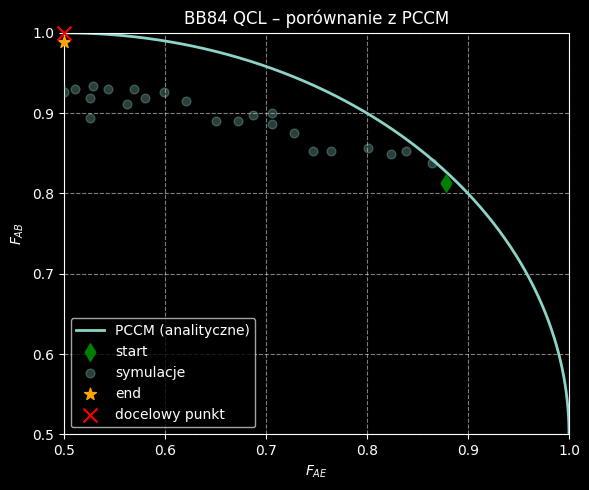

In [33]:
plt_fab_fae(b_q, e_q, 1)

In [34]:
print("All parameters:", eve_protocol.get_all_parameters())

All parameters: {'NU_W_0_0_U0[0]': np.float32(0.48735404), 'NU_W_0_0_U0[1]': np.float32(-0.011601697), 'NU_W_0_0_U0[2]': np.float32(0.07738344), 'NU_W_0_0_U1[0]': np.float32(-1.117545), 'NU_W_0_0_U1[1]': np.float32(-0.97557104), 'NU_W_0_0_U1[2]': np.float32(-0.39336017), 'NU_W_0_0_weyl[0]': np.float32(-0.8271917), 'NU_W_0_0_weyl[1]': np.float32(-0.16335134), 'NU_W_0_0_weyl[2]': np.float32(-0.6047764), 'NU_W_0_1_U0[0]': np.float32(0.04167662), 'NU_W_0_1_U0[1]': np.float32(-0.61321485), 'NU_W_0_1_U0[2]': np.float32(-1.4804118e-09), 'NU_W_0_1_U1[0]': np.float32(-0.075670436), 'NU_W_0_1_U1[1]': np.float32(-0.40176323), 'NU_W_0_1_U1[2]': np.float32(3.6140742e-09), 'NU_W_0_1_weyl[0]': np.float32(-0.056462884), 'NU_W_0_1_weyl[1]': np.float32(-0.056698166), 'NU_W_0_1_weyl[2]': np.float32(-0.6069931), 'NU_W_1_0_U0[0]': np.float32(0.0027100088), 'NU_W_1_0_U0[1]': np.float32(0.23838533), 'NU_W_1_0_U0[2]': np.float32(0.17689657), 'NU_W_1_0_U1[0]': np.float32(0.29907826), 'NU_W_1_0_U1[1]': np.float

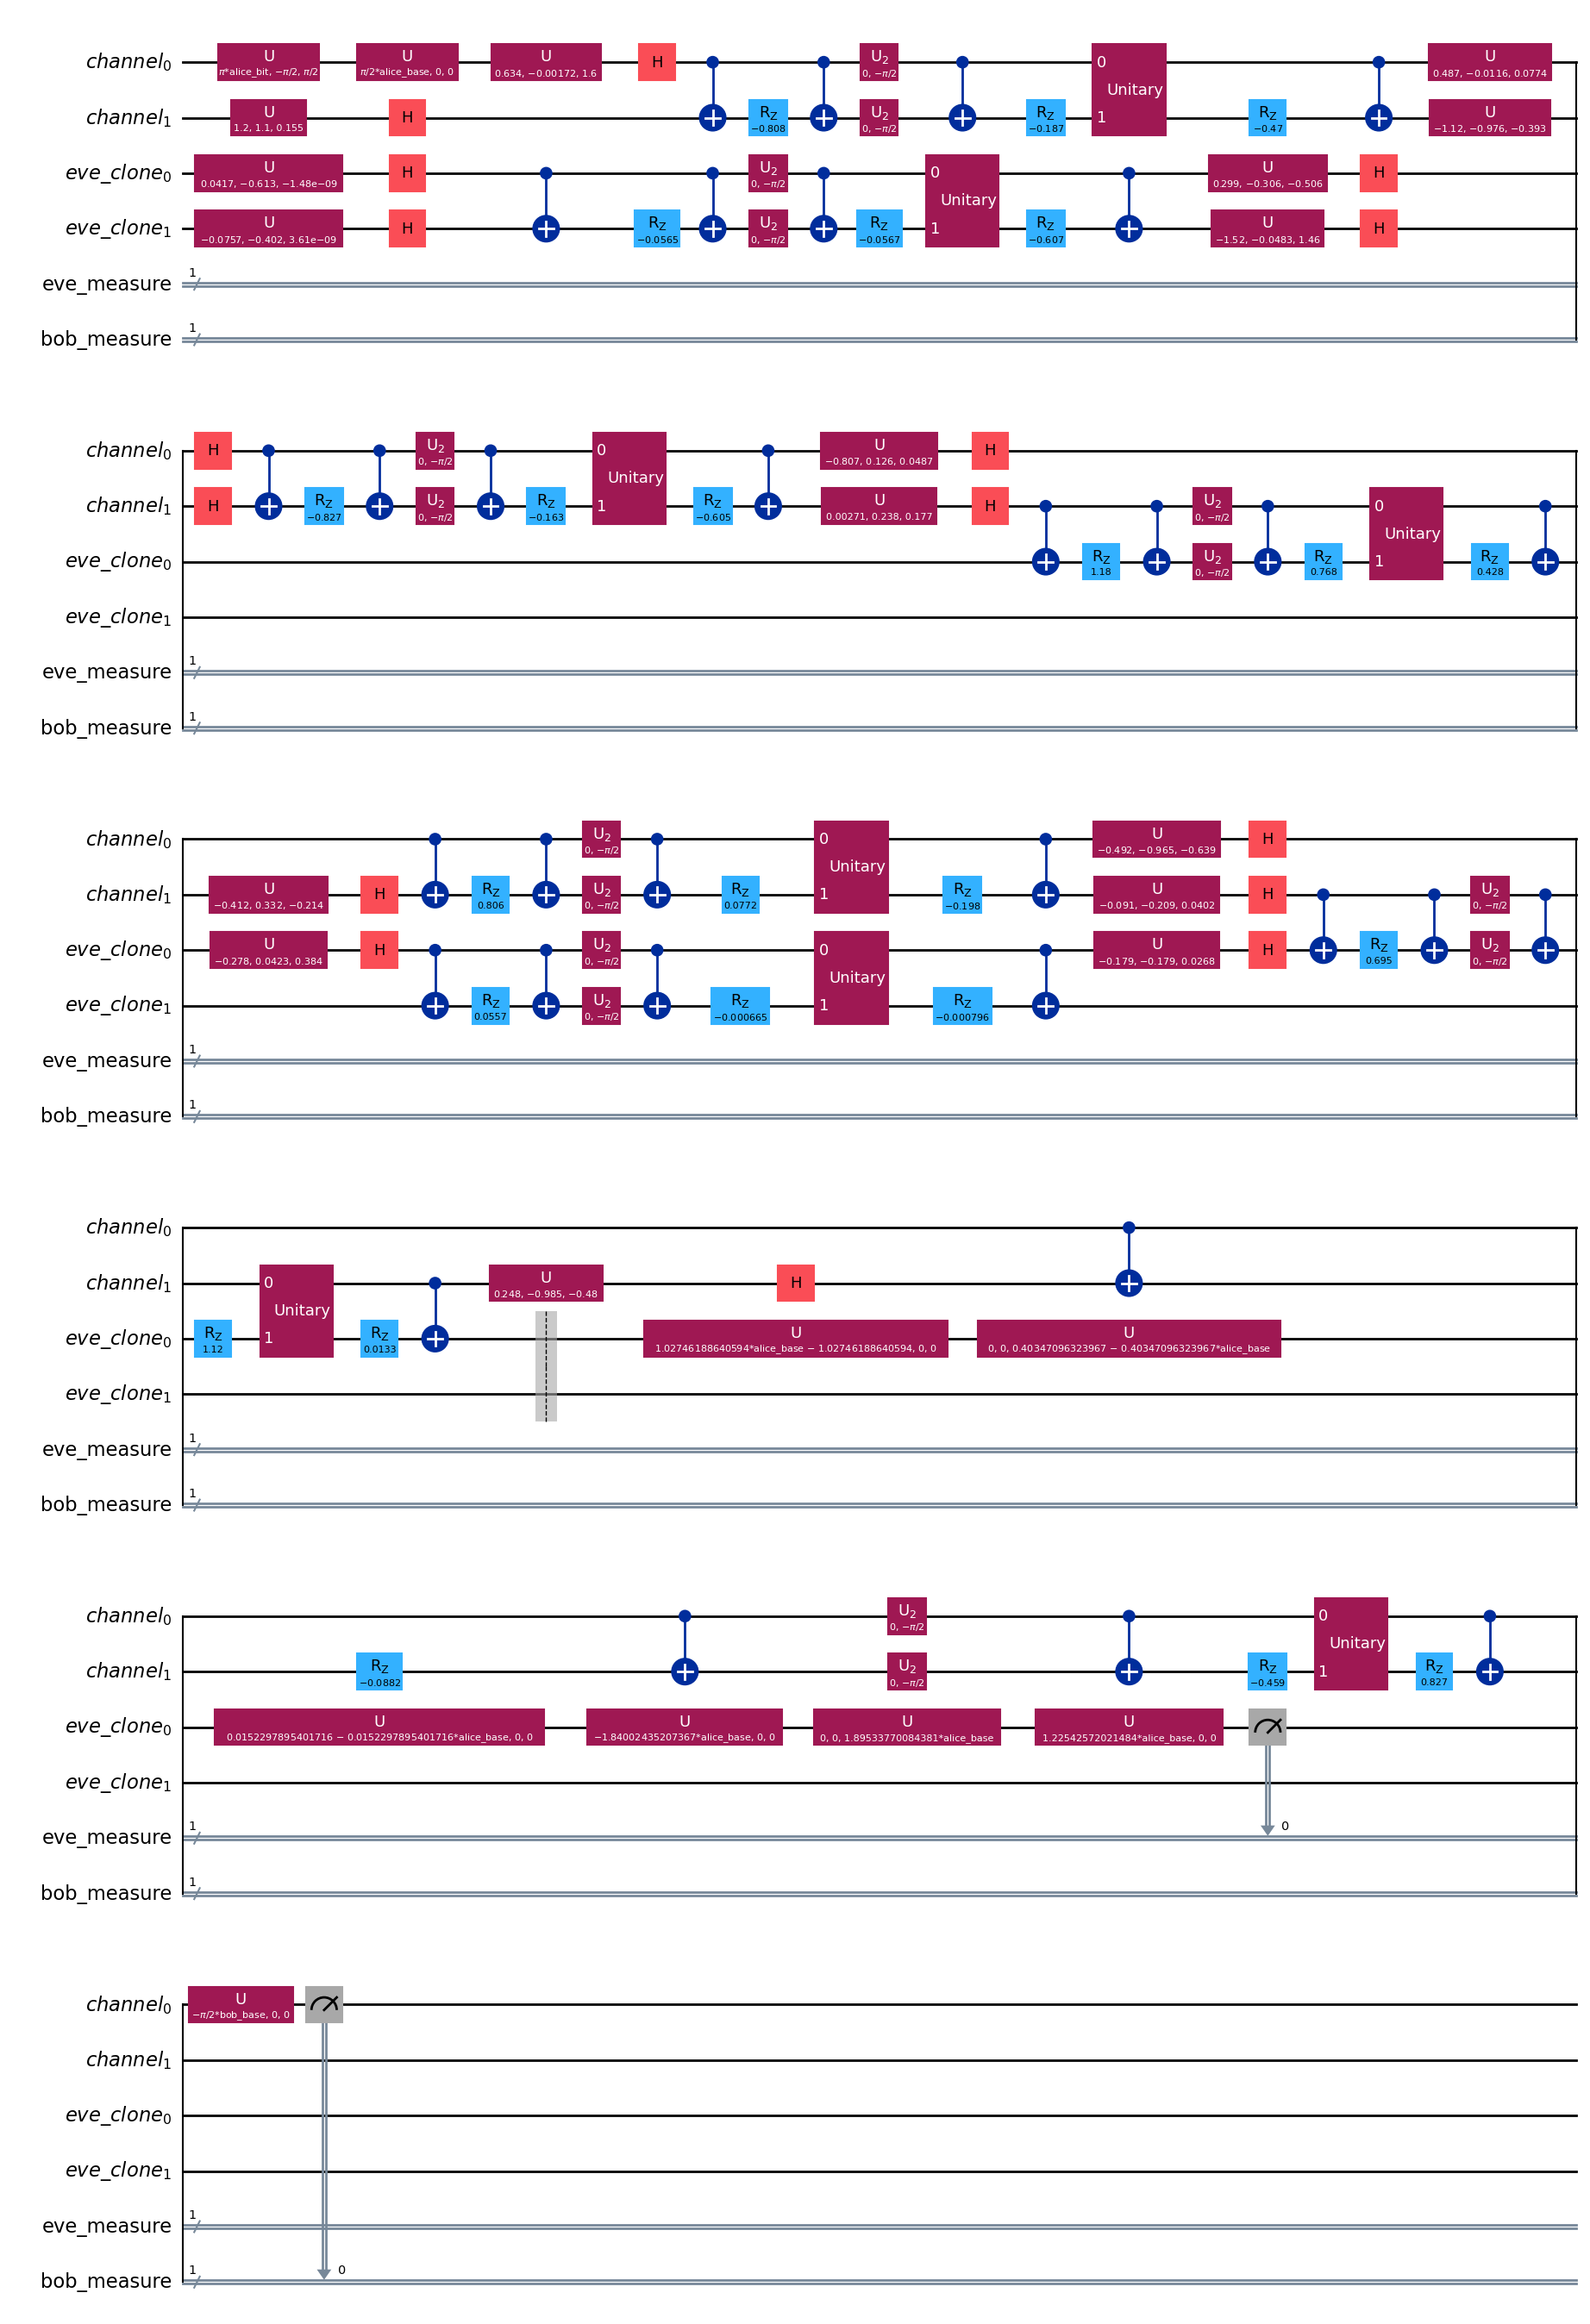

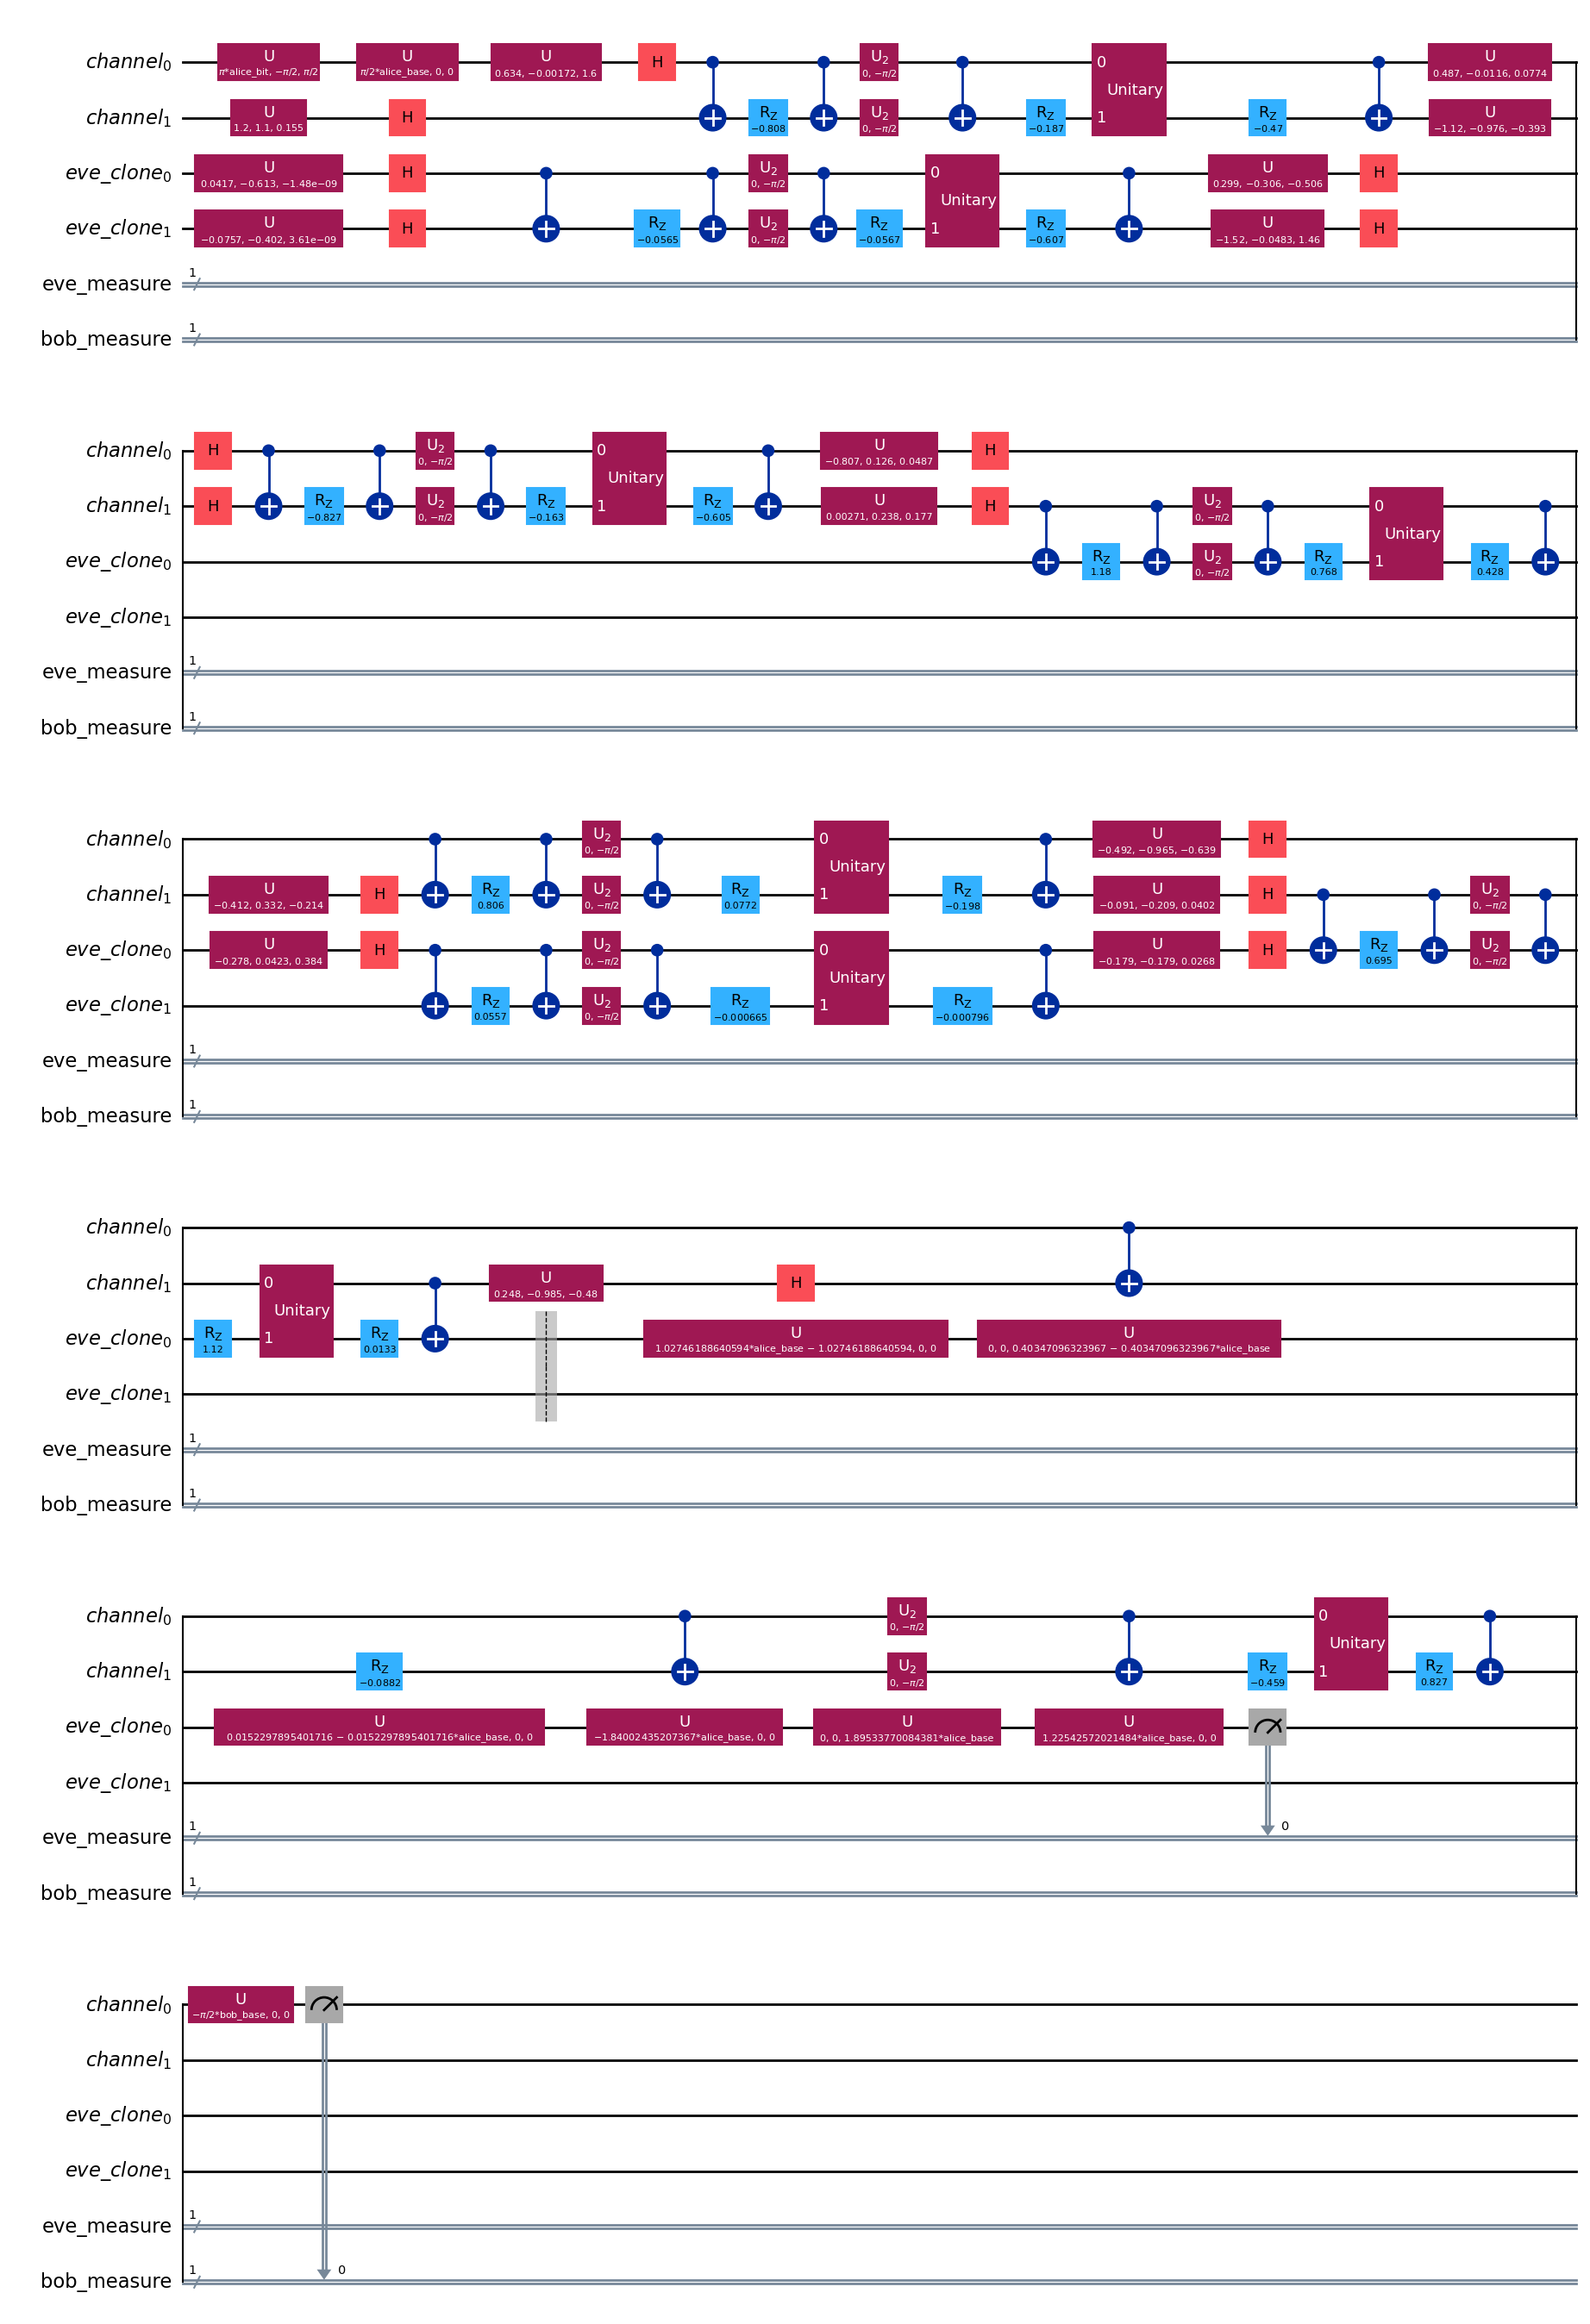

In [35]:
eve_protocol._qc.assign_parameters(eve_protocol.get_all_parameters()).draw("mpl")